# EDA for IDA 2016 (Part 1)

In [5]:
######----- Importing dependencies-----#####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(0)

In [6]:
######----- Setting Working directory-----#####
print(os.getcwd())
os.chdir(r"C:\Users\inabpan4\Desktop\work\Algos\Applied AI\I python notebook\self case study 1\to_uci")
print(os.getcwd())

C:\Users\inabpan4\Desktop\work\Algos\Applied AI\I python notebook\self case study 1\to_uci
C:\Users\inabpan4\Desktop\work\Algos\Applied AI\I python notebook\self case study 1\to_uci


## 1. Ingest data files

In [8]:
train_df = pd.read_csv(r".\aps_failure_training_set.csv", skiprows= 20, na_values='na')
test_df = pd.read_csv(r".\aps_failure_test_set.csv", skiprows= 20, na_values='na')
print("Shape of training dataset is", train_df.shape)
print("Shape of test dataset is", test_df.shape)

Shape of training dataset is (60000, 171)
Shape of test dataset is (16000, 171)


In [12]:
(train_df.head())

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [13]:
(test_df.head())

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


### 1.1  Class distribution Analysis

In [14]:
print("Count of samples per class in train data is\n" , train_df["class"].value_counts())
print("="*100)
print("Count of samples per class in test data is\n" , test_df["class"].value_counts())

Count of samples per class in train data is
 neg    59000
pos     1000
Name: class, dtype: int64
Count of samples per class in test data is
 neg    15625
pos      375
Name: class, dtype: int64


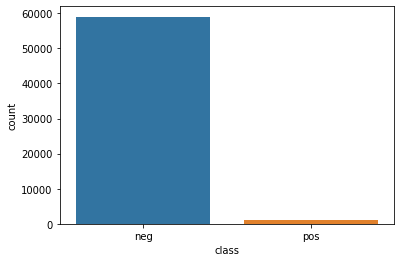

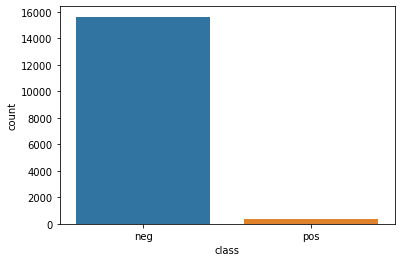

In [15]:
#####-----Countplot of target variable in train and test data-----#####
sns.countplot(train_df["class"])
plt.show()
sns.countplot(test_df["class"])
plt.show()


In [16]:
######----- Relabeling class variable-----#####

train_df["class"]= train_df["class"].replace(["neg", "pos"], [0, 1])
test_df["class"] = test_df["class"].replace(["neg", "pos"], [0, 1])

    1. From above it is evident that there are missing values in the data. 
    2. Column "class"  is the target variable and have two labels, 
        i. "neg" represents negative class with no APS failure 
        ii. "pos" represents positive class with APS failure
    3. There is significant class imbalance in both train and test data. 
    4.  The amount sample belonging to negative class is almost 500 time  more than the number of   sample from positive class
    5. The distribution of both classes in training and test data is almost similar. 


## 2. Basic data cleaning 

### 2.1 Remove duplicate Rows and columns

In [17]:

def Remove_duplicate(data):
    '''This function removes duplicate rows and columns from the data set if there are any
    '''
    data_out = data.drop_duplicates(inplace=False) # removing duplicate rows
    print("number of duplicate rows =", data.shape[0]-data_out.shape[0] )
    data_out.T.drop_duplicates().T # removing duplicate columns by transposing
    print("number of duplicate columns =", data.shape[1]-data_out.shape[1] )
    return(data_out)

train_df = Remove_duplicate(train_df)
test_df = Remove_duplicate(test_df)

number of duplicate rows = 0
number of duplicate columns = 0
number of duplicate rows = 0
number of duplicate columns = 0


    There are no duplicate columns or rows in both train and test data

In [25]:
train_df_test = train_df.dropna(inplace= False)
print("After droping missing values from train dataset the \
number of samples reduced from",train_df.shape[0], "to",  train_df_test.shape[0])

test_df_test = test_df.dropna(inplace= False)
print("After droping missing values from test dataset the \
number of samples reduced from",test_df.shape[0], "to",  test_df_test.shape[0])

After droping missing values from train dataset the number of samples reduced from 60000 to 591
After droping missing values from test dataset the number of samples reduced from 16000 to 165


### 2.2 Separating train and test data into independent (x) and  target variable (y)

In [10]:
train_class_label= train_df["class"].copy()
test_class_label = test_df["class"].copy()

x_train = train_df.drop("class", axis = 1, inplace= False)
x_test = test_df.drop("class", axis = 1, inplace= False)

### 2.3  Analysis of feature-wise missing value

    As observed earlier there ere missing values in both train and test data. SO in the following swction an analysis on feature wise missing data has been provided

In [11]:
feature_wise_NAs_train = (x_train.isna().sum(axis=0)/x_train.shape[0]*100)
feature_wise_NAs_test = (x_test.isna().sum(axis=0)/x_test.shape[0]*100)
print(feature_wise_NAs_train.sort_values(ascending = False))

In [13]:
print(feature_wise_NAs_test.sort_values(ascending = False))

br_000    82.05625
bq_000    81.13125
bp_000    79.50625
bo_000    77.35000
cr_000    77.26875
            ...   
ci_000     0.53750
cj_000     0.53750
ck_000     0.53750
bt_000     0.17500
aa_000     0.00000
Length: 170, dtype: float64


#### 2.3.1 Distribution plot for feature-wise fraction of missing data

    In the following section, density plot of feature-wise fraction of missing values will be shown. This plot will be helpful in understanding distribution of feature-wise fraction of missing values. In order to understand further granularity on distribution of feature-wise fraction of missing values, quantiles are printed. 
    Both density plot and quantile value is required to identify upper threshold for feature-wise fraction of missing values to drop features if needed

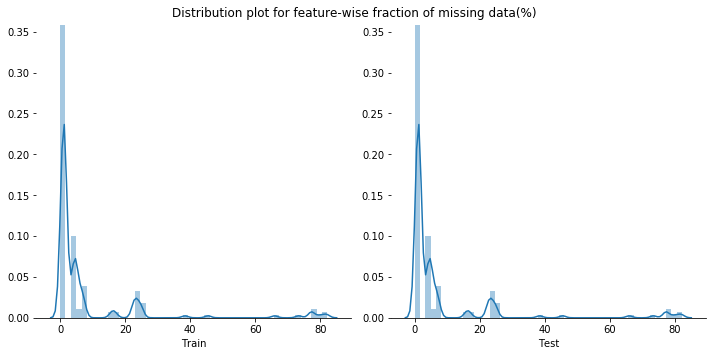

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
sns.despine(left=True)

sns.distplot( feature_wise_NAs_train.values, ax= axes[0])
axes[0].set_xlabel("Train")

sns.distplot(feature_wise_NAs_train.values,  ax= axes[1])
axes[1].set_xlabel("Test")
fig.suptitle("Distribution plot for feature-wise fraction of missing data(%) ")

plt.tight_layout()
plt.show()


In [15]:
#####---- Quantile values for fraction of missing values in train data -----#####
for q in np.arange(0.1,1.1,0.1):
    print(int(q*100), "th quatile feature-wise fraction of missing dat for training data is ", 
          feature_wise_NAs_train.quantile(q))
print("="*100)
    
for q in np.arange(0.9,1.01,0.01):
    print(int(q*100), "th quatile feature_wise fraction of missing dat for training data is ", 
      feature_wise_NAs_train.quantile(q))   

10 th quatile feature-wise fraction of missing dat for training data is  1.0699999999999998
20 th quatile feature-wise fraction of missing dat for training data is  1.1183333333333334
30 th quatile feature-wise fraction of missing dat for training data is  1.1183333333333334
40 th quatile feature-wise fraction of missing dat for training data is  1.1183333333333334
50 th quatile feature-wise fraction of missing dat for training data is  1.1466666666666667
60 th quatile feature-wise fraction of missing dat for training data is  4.166666666666666
70 th quatile feature-wise fraction of missing dat for training data is  4.5405
80 th quatile feature-wise fraction of missing dat for training data is  6.68
90 th quatile feature-wise fraction of missing dat for training data is  23.013333333333335
100 th quatile feature-wise fraction of missing dat for training data is  82.10666666666665
90 th quatile feature_wise fraction of missing dat for training data is  23.013333333333335
91 th quatile f

In [16]:
#####---- Quantile values for fraction of missing values in test data -----#####
for q in np.arange(0.1,1.1,0.1):
    print(int(q*100), "th quantile forFeaturewise fraction of missing dat for test data is ", 
          feature_wise_NAs_test.quantile(q))
print("="*100)
    
for q in np.arange(0.9,1.01,0.01):
    print(int(q*100), "th quantile forFeaturewise fraction of missing dat for test data is ", 
      feature_wise_NAs_test.quantile(q))   

10 th quantile forFeaturewise fraction of missing dat for test data is  1.0562500000000001
20 th quantile forFeaturewise fraction of missing dat for test data is  1.18125
30 th quantile forFeaturewise fraction of missing dat for test data is  1.2
40 th quantile forFeaturewise fraction of missing dat for test data is  1.2
50 th quantile forFeaturewise fraction of missing dat for test data is  1.20625
60 th quantile forFeaturewise fraction of missing dat for test data is  4.3
70 th quantile forFeaturewise fraction of missing dat for test data is  4.775
80 th quantile forFeaturewise fraction of missing dat for test data is  6.8375
90 th quantile forFeaturewise fraction of missing dat for test data is  23.2375
100 th quantile forFeaturewise fraction of missing dat for test data is  82.05624999999999
90 th quantile forFeaturewise fraction of missing dat for test data is  23.2375
91 th quantile forFeaturewise fraction of missing dat for test data is  23.237499999999997
92 th quantile forFeat

    1. Both train and test data have missing data and interestingly the feature-wise fraction of missing data have similar distribution for both train and test dataset. 
    2. From the distribution plots it is apparent that for most of the features fraction of missing data is <= 50%. However there are few features which have more than 75% of missing data. This observation is consistent for both train and test data
    3. In line with above observation a finer granularity can be seen from quantile analysis. From quantile analysis we can conclude that 96 % features are having <= 67.66 % missing data and 99% features are having <= 80.0% missing data.

#### From the above analysis we can conclude that if we drop features with more than 75% missing data, we will have almost 97% of feature still available. Which means  164 features


### 2.4 Features with constant value or zero varience

In [17]:
Constant_features = []

for col in x_train.columns:
    if x_train[col].dropna().values.std() == 0:
        Constant_features.append(col)
print("features with constant value or zero varience are " ,  Constant_features )



features with constant value or zero varience are  ['cd_000']


    'cd_000' feature has constant value and hence does not have any information for classification task and should be dropped 

#### 2.4.1 Dropping features with more than 75% missing data  or 0 varience from both train and test data 

In [18]:
features_to_drop = list(feature_wise_NAs_test.index[feature_wise_NAs_test.values > 75])
features_to_drop.extend(Constant_features) # appending feature with 0 varience to feature to drop list 
print("features to be dropped are ", features_to_drop)
train_preprocessed = train_df.drop(features_to_drop, axis = 1, inplace= False)
test_preprocessed = test_df.drop(features_to_drop, axis = 1, inplace= False)


features to be dropped are  ['ab_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000', 'cd_000']


In [19]:
print(train_preprocessed.shape)
print(test_preprocessed.shape)

(60000, 164)
(16000, 164)


In [20]:
print("Overall percentage of missing data  in training set before feature removal is ", 
     train_df.isna().values.sum((0,1))/ x_train.size*100)

print("Overall percentage of missing data  in training set after feature removal is ", 
     train_preprocessed.isna().values.sum((0,1))/ train_preprocessed.size*100)

Overall percentage of missing data  in training set before feature removal is  8.333480392156863
Overall percentage of missing data  in training set after feature removal is  5.738028455284553


    The number of features dropped from 170 to 163. So 7 features were dropped. After dropping those 7 features total fraction of missing data reduced from 8.3%  to 5.73% 

   ### 2.5  Checking if there are any missing class vaues the data

In [21]:
print("number of missing class values in train data = ", train_df["class"].isna().sum())
print("number of missing class values in test data = ", test_df["class"].isna().sum())

number of missing class values in train data =  0
number of missing class values in test data =  0


## 3. Impuation for missing data
    Imputation strategy for a feature will be performed based on fraction of missing data. For features with lesser amount of missing data median imputation will be performed, where as for features with large fraction of missing data soft imputation will be performed. From the quartile analysis we can observe that there are  80% features with less than or equal to 6.8% missing data and 90% features with less than or equal to 23.013 % missing data. So we will select any feature with <= 20% missing data to be suitable for median imputation and soft imputation will be performed for remaining features    

### 3.1. Median Imputation

In [22]:
def train_meadian_imputation(data, missing_val_threshold = 20):
    '''
    train_meadian_imputation function divides features in data into 2 sets based \
 on imputation method to be adapted. The function also calculate median values for\
 positive and negative class data separately. 
Parameters
============================================
input: 
    data: Pandas dataframe
         Provide the training data as input
    missing_val_threshold: scalar
         The threshold on fration of missing values for spliting features
Output: 
    features_for_median_impute:List
         List of features to be median imputed
    features_for_soft_impute:List
         List of features to be soft imputed
    median_pos_class: Pandas series
         median values for positive class
    median_neg_class: Pandas series
         median values for negative class
    '''
    train_data = data.copy()
    feature_wise_NAs_train = (train_data.isna().sum(axis=0)/train_data.shape[0]*100)

    features_for_median_impute = list(feature_wise_NAs_train[feature_wise_NAs_train <= missing_val_threshold].index)
    features_for_median_impute.remove("class")
    features_for_soft_impute = list(feature_wise_NAs_train[feature_wise_NAs_train > missing_val_threshold].index)

    median_pos_class = data.loc[data["class"] == 1, features_for_median_impute].median(skipna = True)
    median_neg_class = data.loc[data["class"] == 0, features_for_median_impute].median(skipna = True)
    return(features_for_median_impute, 
           features_for_soft_impute,
           median_pos_class, 
           median_neg_class)

def meadian_imputation(data, 
                       features_for_median_impute,
                       median_pos_class, 
                       median_neg_class):
    
    '''
meadian_imputation function performs median imputation on input data based on the learnt \
 parameters. The median imputation is applied separately for each classes. 

Parameters
============================================
input: 
    data: Pandas dataframe
         Provide the data to be imputed
    features_for_median_impute:List
         List of features to be median imputed
    median_pos_class: Pandas series
         median values for positive class
    median_neg_class: Pandas series
         median values for negative class
Output: 
    data: Pandas dataframe
         Imputed version of input data( imputation happens for only features to be median imputed )

    '''
    
    pos_data = data.loc[data["class"] == 1].copy()
    neg_data = data.loc[data["class"] == 0].copy()
    pos_data.fillna(median_pos_class, inplace = True) 
    neg_data.fillna(median_neg_class, inplace = True)     
    data_copy = pd.concat([pos_data, neg_data]).sort_index()
    
    return(data_copy)


In [112]:
#####----- Performing Median inputation-----#####
(features_for_median_impute,  
 features_for_soft_impute,
 median_pos_class, median_neg_class) = train_meadian_imputation(train_preprocessed)

print("number of features to be median imputed is", len(features_for_median_impute))
train_median_imputed = meadian_imputation(train_preprocessed, 
                                          features_for_median_impute,
                                          median_pos_class, 
                                          median_neg_class)

test_median_imputed = meadian_imputation(test_preprocessed, 
                                          features_for_median_impute,
                                          median_pos_class, 
                                          median_neg_class)

number of features to be median imputed is 145


In [114]:
train_median_imputed.shape

(60000, 164)

### 3.2 VIF
https://www.statisticshowto.com/variance-inflation-factor/

        VIF score provides a quantification for inflation in variance of a feature due to multicollinearity. Unlike correlation coefficients VIF considers all features to evaluate VIF score. VIF score of 1 indicate not multicollinearity whereas 1 to 5 is moderate collinearity. VIF score of more than 10 indicates severe multicollinearity.
        In this work VIF score has been used to select the list of independent features for soft imputation 
        In the following section an analysis on VIF scores for all features have been shown through a plot of log of VIF in increase order and quantile values. These help us visualize how much multicollinearity is there in the dataset 


In [26]:
#####----- Function to evaluated VIF scare for all features with no missing value-----#####
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
independent_features = list(feature for feature in train_median_imputed.columns 
                            if  feature not in features_for_soft_impute 
                            if feature != "class"
                           )
vif_df = calc_vif(train_median_imputed[independent_features].sample(10000))


10 th quatile feature-wise fraction of VIF  2.1540089205447543 and Log VIF is  0.7673151869519481
20 th quatile feature-wise fraction of VIF  3.919880009562122 and Log VIF is  1.366040869904881
30 th quatile feature-wise fraction of VIF  12.22570987631935 and Log VIF is  2.5016910664572096
40 th quatile feature-wise fraction of VIF  93.52777174446285 and Log VIF is  4.525944810193805
50 th quatile feature-wise fraction of VIF  559.0360301400916 and Log VIF is  6.326213925711426
60 th quatile feature-wise fraction of VIF  4883.62442469225 and Log VIF is  8.493402047726235
70 th quatile feature-wise fraction of VIF  70370.86835918107 and Log VIF is  11.15313532100005
80 th quatile feature-wise fraction of VIF  18027031.257831264 and Log VIF is  16.706707127433326
90 th quatile feature-wise fraction of VIF  1572202807.6277332 and Log VIF is  21.1753736084327
100 th quatile feature-wise fraction of VIF  7805198660954.065 and Log VIF is  29.685811122609056


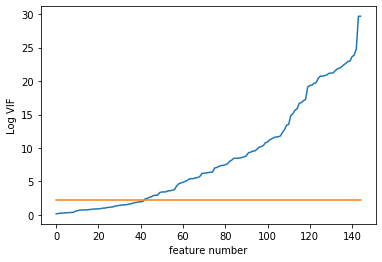

In [28]:
VIF_threshold  = 10 ## extreme multicolinearity
for q in np.arange(0.1,1.1,0.1):
    print(int(q*100), "th quatile feature-wise fraction of VIF ", 
          vif_df["VIF"].quantile(q), "and Log VIF is " , np.log(vif_df["VIF"]).quantile(q))
    
plt.plot(np.log(vif_df["VIF"].sort_values(ascending= True).values))
plt.plot([np.log(VIF_threshold)]*vif_df.shape[0])
plt.ylabel("Log VIF")
plt.xlabel("feature number")
plt.show()


    From the plots we can see there are variable with high VIF scores which indicates that there are multicollinearity among variables. All features with VIF score more than 10 are dropped from the list of independent features for soft imputation.

##### 3.2.1 Recursive feature removal using VIF score

In [30]:
def feature_selection_VIF(X, VIF_threshold = 10):
    vif_df = calc_vif(X)
    max_vif_score = vif_df["VIF"].values.max()
    print("number of features are ", X.shape[1], "and maximum VIF score is ", max_vif_score)
    
    if (max_vif_score > VIF_threshold) :
        features_subset = vif_df.loc[vif_df["VIF"] < max_vif_score, "variables"].values
        vif_df =  feature_selection_VIF(X[features_subset], VIF_threshold)
        return(vif_df)
    else:
        return(vif_df)
    
    
    
vif_df = feature_selection_VIF(train_median_imputed[independent_features].sample(10000) ,10) ## taking lesser sample for faster execution


number of features are  145 and maximum VIF score is  7081131489576.252
number of features are  144 and maximum VIF score is  1598154587427.4294
number of features are  142 and maximum VIF score is  91466862195.89735
number of features are  141 and maximum VIF score is  8543322474.351148
number of features are  140 and maximum VIF score is  1217830588.9698374
number of features are  139 and maximum VIF score is  143401.75056352344
number of features are  138 and maximum VIF score is  25640.374281176457
number of features are  137 and maximum VIF score is  17678.221748741573
number of features are  136 and maximum VIF score is  8567.075589359221
number of features are  135 and maximum VIF score is  2168.9183439387425
number of features are  134 and maximum VIF score is  1176.6340389364543
number of features are  133 and maximum VIF score is  677.6218724216369
number of features are  132 and maximum VIF score is  532.1223408537908
number of features are  131 and maximum VIF score is  224

In [35]:

print("number of selected features are ", vif_df["variables"].shape[0],
      "from of list of ", len(independent_features), " features")

number of selected features are  92 from of list of  145  features


        "variables" column from  "vif_df" Dataframes contains list of features with VIF score of less than 10 and are used as independent features for soft imputation in below section 

### 3.3. Soft Imputation
#### 3.3.1 Functions for soft imputation


In [23]:
def train_soft_impute(data,
                      features_for_soft_impute,         
                      independent_features ,
                      max_iter = 5, 
                      test_size =0.3):
    '''
train_soft_impute function creates models for soft imputation for features which are selected\
 for soft imputation. Firstly a copy of input data is created. Two feature lists are also initialized\
 which will change in each iteration. For a given an iteration feature list 1 contains features to be \
 soft imputed. Similarly given an iteration feature list 2 contains features that are already trained \
 by soft imputation during earlier iteration and independent features. feature list 2 is initialized \
 to independent features and in each iteration learnt /trained features from the list of features\
 to be soft imputed is appended. The learnt/trained features are dropped from feature list 1 in each iteration\
     There are 5 iterations for soft imputation of all selected features. All features in the list of features\
 to be soft imputed may not get learnt by using independent features only. Hence there are multiple iterations and \
 feature list 2 is appended with latest trained features in each iteration. 
     There are two early stopping criteria. 
 1. Given an iteration with no learnt features, execution of loop is terminated and list of unlearnt features\
 along with learnt models are returned. 
 2. In any iteration if feature list 1 is empty after dropping all learnt features till latest iteration\
 executions is terminated.
     Inside each iteration input data is divided into train and test dataset. For each feature in feature\
 list 1 a random forest based regressor is trained using training data. K fold cross validation for \
 hyper-parameter tuning is also performed inside the loop using RandomizedSearchCV from SKlearn library.\
 The R-square score of the learnt model is evaluated on test data and if it is more than 0.1, then the feature is \
 added to learnt feature list and the learnt model is appended to model list.
  

Parameters
============================================
input: 
    data: Pandas Dataframes
         Provide the training data
    features_for_soft_impute:List
         List of features to be soft imputed
    independent_features: list
         list of independent features to be used for building models for soft impute
    max_iter: Scalar(default = 5)
         Maximum number of iteration
    test_size: Scalar(default = 0.3)
         Train test split ration. By default 80% is training data and 20% is test data
Output: 
    models_for_soft_impute: Dictionary
         Dictionary of iteration wise learnt feature along with the model. This output is a dictionary \
     with each element being another dictionary. The elements of dictionary named "models_for_soft_impute" \
     are dictionaries with name as "iter_k" where "k" is the iteration number. Each element dictionary \
     has 2 elements/list. Lets take the example of element dictionary "iter_k". it will have 2 elements\
         i. features: list of features got trained in iteration number "k" 
         ii. models:  List of models with respect to list of features got trained in iterations number "k" \
    remaining_features: list
         List of features which could not be trained using soft imputation 
    '''

    
    from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
    from sklearn.metrics import r2_score , mean_squared_error
    from sklearn.ensemble import RandomForestRegressor
    
    data_copy = data.copy() ## Creating a copy of input data

    models_for_soft_impute = dict()
    feature_ls_1= features_for_soft_impute
    feature_ls_2 = independent_features
    
    ###---Training models for soft imputation---###
    
    for count in range(max_iter):
        print("Current itteration  number is ",count)
        
        data_tr, data_te = train_test_split(data_copy, test_size = test_size, random_state =0) ## Spliting data into train and test data set
        
        ## initializing variables to empty list ##
        features = []
        models =[]
        for col in feature_ls_1:
            print("\t Currently training model for ", col)
            
        ###--- Finding non NAN index for training data to build model---###
            none_na_idx = list(data_tr.index[np.where(data_tr[col].notna())[0]])
            x_pos_tr = data_tr.loc[none_na_idx,feature_ls_2]
            y_pos_tr = data_tr.loc[none_na_idx, col]    

        #---Hyperparameter selection using CV---### 
#             param = {"n_estimators": [ 500,100, 1500],
#                      "max_depth" : [None]}

            
#             regressor = RandomForestRegressor()
#             cv_regressor = RandomizedSearchCV(regressor, param_distributions= param, 
#                                               n_jobs= 4, scoring= "r2", n_iter =5, 
#                                              random_state = 0)
#             cv_regressor.fit(x_pos_tr, y_pos_tr)
#             print("\t",cv_regressor.best_params_, cv_regressor.best_score_)

#             regressor = RandomForestRegressor(n_estimators= cv_regressor.best_params_["n_estimators"] ,
#                                               max_depth= cv_regressor.best_params_["max_depth"]
#                                              ).fit(x_pos_tr, y_pos_tr)
            regressor = RandomForestRegressor(n_estimators= 500 ,
                                              max_depth= None
                                             ).fit(x_pos_tr, y_pos_tr)

        ###--- Finding non NAN index for testing data to tes model---###
            none_na_idx = list(data_te.index[np.where(data_te[col].notna())[0]])
            x_pos_te = data_te.loc[none_na_idx,feature_ls_2]
            y_pos_te = data_te.loc[none_na_idx, col]

        ###--- Printing model result---###

            print(" \t\tTest:\t" , "r2_score", r2_score(y_pos_te,
                                       regressor.predict(x_pos_te) ))
            print(" \t\tTrain:\t" ,"r2_score" , r2_score(y_pos_tr, 
                                        regressor.predict(x_pos_tr) ))
            
        ###--- Storing the model for imputation---###
            
            if r2_score(y_pos_te,regressor.predict(x_pos_te)) > 0.1:
                
                features.append(col) 
                models.append(regressor)
                
            ###--- Preparing data for next iteration ---###
                na_idx = list(data_copy.index[np.where(data_copy[col].isna())[0]])
                x_pos_na = data_copy.loc[na_idx,feature_ls_2]
                y_pos_impute = regressor.predict(x_pos_na)
                data_copy.loc[x_pos_na.index, col]  = y_pos_impute
        
        ###--- Updating lists and model dictionary  ---###          
        if len(features) != 0:  
            feature_ls_2.extend(features) # adding learnt featues to list of non na features  
            feature_ls_1 = [x for x in feature_ls_1 if x not in features] # Removing learnt featuesfrom lis t of features to be soft imputed
           
            print("Number of trained_features", len(features), "\n", 
                  "Number of remaining features to be trained", len(feature_ls_1),"\n", 
                  "Number of already trained features", len(feature_ls_2))
            
        ###--- Adding a result dictionary to final dictionary  ---###          
            result = dict({"features": features, 
                          "models": models} )
            models_for_soft_impute["iter_" + str(count)] = result ## Storing
        else:
            print("Terminating loop as there are no features having R square value of more than 0.1.")
            print("remaining features are ", feature_ls_1)
            break
        if len(feature_ls_1) ==0:
            print("No remaining features for imputation ")
            break
        if count  == max_iter:
            print("Completed ",max_iter," itternations ")      
            print("remaining features are ", feature_ls_1)
        print("="*100)
    remaining_features = feature_ls_1
    return(models_for_soft_impute, remaining_features)



In [24]:
def soft_impute(data,
                features_for_soft_impute,
                independent_features,
                models_for_soft_impute):

    '''
soft_impute function perfoms soft imputation based on models learnt during training phase. 
Parameters
============================================
input: 
    data: Pandas Dataframes
         Provide the training data
    features_for_soft_impute:List
         List of features to be soft imputed
    independent_features: list
         list of independent features to be used for building models for soft impute
    models_for_soft_impute: Dictionary
             Dictionary of iteration wise learnt feature along with the model. This output is a dictionary \
         with each element being another dictionary. The elements of dictionary named "models_for_soft_impute" \
         are dictionaries with name as "iter_k" where "k" is the iteration number. Each element dictionary \
         has 2 elements/list. Lets take the example of element dictionary "iter_k". it will have 2 elements\
             i. features: list of features got trained in iteration number "k" 
             ii. models:  List of models with respect to list of features got trained in iterations number "k" \
Output: 
    data: Pandas dataframe
         Imputed version of input data( imputation happens for only features to be soft imputed )
    '''

    data_copy = data.copy()
      
    feature_ls_2 =independent_features
    feature_ls = []
    
    for count in range(5):
        if count >= len(models_for_soft_impute):
            break
        print(count)

        iter_no = list(models_for_soft_impute.keys())[count]
        features= models_for_soft_impute[iter_no]["features"]
        models = models_for_soft_impute[iter_no]["models"]
        
        feature_ls.extend(features)
        for idx, col in enumerate(features):
            if col not in features_for_soft_impute:
                print("error", col )
            
            regressor = models[idx]
            na_idx = list(data_copy.index[np.where(data_copy[col].isna())[0]])
            x_pos_na = data_copy.loc[na_idx,feature_ls_2]
            y_pos_na = data_copy.loc[na_idx, col]    

            y_pos_impute = regressor.predict(x_pos_na)
            data_copy.loc[x_pos_na.index, col]  = y_pos_impute
        
        feature_ls_2.extend(features)
        
    return(data_copy)

#### 3.3.2 Soft imputation fof positive class


In [36]:
#####----- Soft Imputation for positive class-----#####

models_for_soft_impute_pos, untrained_feature = train_soft_impute(train_median_imputed[train_median_imputed["class"] == 1],
                                                              independent_features= list(vif_df["variables"].values),
                                                              features_for_soft_impute = features_for_soft_impute)



train_pos_soft_imputed = soft_impute(train_median_imputed[train_median_imputed["class"] == 1],
                                     independent_features= list(vif_df["variables"].values),
                                     features_for_soft_impute= features_for_soft_impute,
                                     models_for_soft_impute=models_for_soft_impute_pos )

test_pos_soft_imputed = soft_impute(test_median_imputed[test_median_imputed["class"] == 1],
                                     independent_features= list(vif_df["variables"].values),
                                     features_for_soft_impute= features_for_soft_impute,
                                     models_for_soft_impute=models_for_soft_impute_pos )

Current itteration  number is  0
	 Currently training model for  ad_000
 		Test:	 r2_score -0.17267261504148834
 		Train:	 r2_score 0.9272287423901108
	 Currently training model for  bk_000
 		Test:	 r2_score 0.4978100626315761
 		Train:	 r2_score 0.9275517109162437
	 Currently training model for  bl_000
 		Test:	 r2_score 0.5305841298405038
 		Train:	 r2_score 0.9286792702885968
	 Currently training model for  bm_000
 		Test:	 r2_score 0.47389740871932107
 		Train:	 r2_score 0.9379921685206276
	 Currently training model for  bn_000
 		Test:	 r2_score 0.5284652946295119
 		Train:	 r2_score 0.934230615441154
	 Currently training model for  cf_000
 		Test:	 r2_score 0.3429732321110671
 		Train:	 r2_score 0.9315075854336842
	 Currently training model for  cg_000
 		Test:	 r2_score -0.12690699919621728
 		Train:	 r2_score 0.856083722579533
	 Currently training model for  ch_000
 		Test:	 r2_score -0.009523809523809268
 		Train:	 r2_score 1.0
	 Currently training model for  co_000
 		Test:	

#### 3.3.3 Soft imputation fof negative class


In [38]:
models_for_soft_impute_neg, untrained_feature_2 = train_soft_impute(train_median_imputed[train_median_imputed["class"] == 0],
                                                                      independent_features= list(vif_df["variables"].values),
                                                                      features_for_soft_impute = features_for_soft_impute,
                                                                      test_size= 0.8
                                                                     )



train_neg_soft_imputed = soft_impute(train_median_imputed[train_median_imputed["class"] == 0],
                                     independent_features= list(vif_df["variables"].values),
                                     features_for_soft_impute= features_for_soft_impute,
                                     models_for_soft_impute=models_for_soft_impute_neg )

test_neg_soft_imputed = soft_impute(test_median_imputed[test_median_imputed["class"] == 0],
                                     independent_features= list(vif_df["variables"].values),
                                     features_for_soft_impute= features_for_soft_impute,
                                     models_for_soft_impute=models_for_soft_impute_neg )

Current itteration  number is  0
	 Currently training model for  ad_000
 		Test:	 r2_score -188067028.2427006
 		Train:	 r2_score 0.8269168949955606
	 Currently training model for  bk_000
 		Test:	 r2_score 0.9188076128443337
 		Train:	 r2_score 0.9909634707261091
	 Currently training model for  bl_000
 		Test:	 r2_score 0.8779734186369266
 		Train:	 r2_score 0.9867435620113344
	 Currently training model for  bm_000
 		Test:	 r2_score 0.8889661176505926
 		Train:	 r2_score 0.9849385604872561
	 Currently training model for  bn_000
 		Test:	 r2_score 0.8860017382933787
 		Train:	 r2_score 0.9869591331661447
	 Currently training model for  cf_000
 		Test:	 r2_score -187730253.50135452
 		Train:	 r2_score 0.8506434952790618
	 Currently training model for  cg_000
 		Test:	 r2_score 0.3498849047146708
 		Train:	 r2_score 0.8847198334464008
	 Currently training model for  ch_000
 		Test:	 r2_score -0.23877383225102178
 		Train:	 r2_score 0.8433026853796
	 Currently training model for  co_000


#### 3.3.4. Performing median imputation for remaining features

        Union operation of set of features for both positive and negative class (which are not imputed during soft imputation due to poor R square value ) is performed. As these features can not be modelled using other features, median imputation has been performed for above features 

In [108]:
#####-----Finding list of remaining features after soft imputation-----#####
remaining_features = list(set(untrained_feature_2).union(set(untrained_feature)))
print("list of remaining features ", remaining_features)
train_soft_imputed =  pd.concat([train_pos_soft_imputed, train_neg_soft_imputed]).sort_index()
test_soft_imputed =  pd.concat([test_pos_soft_imputed, test_neg_soft_imputed]).sort_index()

list of remaining features  ['ad_000', 'ch_000', 'cy_000', 'co_000', 'cf_000', 'da_000', 'db_000']


In [62]:
train_pos_soft_imputed = train_pos_soft_imputed.fillna(train_pos_soft_imputed[remaining_features].median())
train_neg_soft_imputed = train_neg_soft_imputed.fillna(train_neg_soft_imputed[remaining_features].median())

test_pos_soft_imputed = test_pos_soft_imputed.fillna(train_pos_soft_imputed[remaining_features].median())
test_neg_soft_imputed = test_neg_soft_imputed.fillna(train_neg_soft_imputed[remaining_features].median())


train_imputed = pd.concat([train_pos_soft_imputed, train_neg_soft_imputed]).sort_index()
test_imputed = pd.concat([test_pos_soft_imputed, test_neg_soft_imputed]).sort_index()

In [96]:
train_imputed.shape, test_imputed.shape

((60000, 164), (16000, 164))

In [63]:
#####-----Storing imputed file-----#####
train_imputed.to_csv("train_imputed_data.csv")
test_imputed.to_csv("test_imputed_data.csv")

### 3.4. Distrinution comparisom of data before and after imputation
    Histograms of data before and after imputation for features which were selected for soft imputation has been shown below. An ideal imputation should not impact information available in the data and hence the distribution plot for a given class should not change much. 

#### 3.4.1 Histograms for Positive class


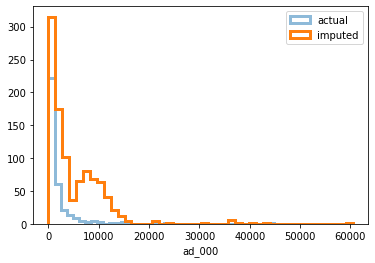

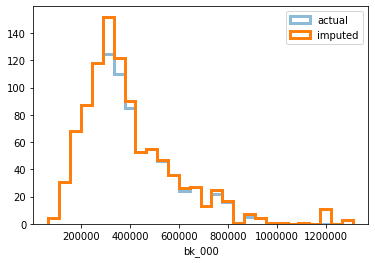

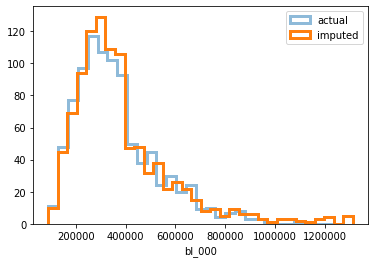

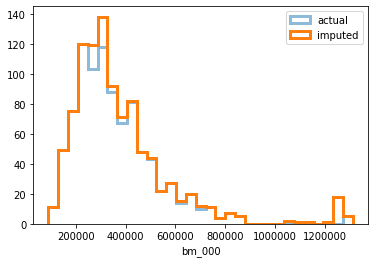

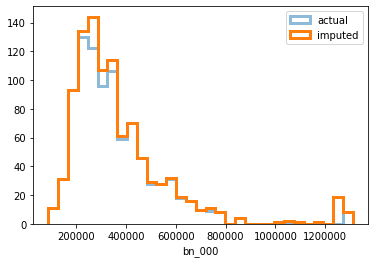

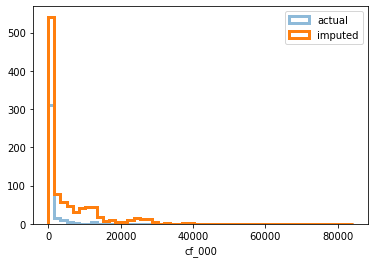

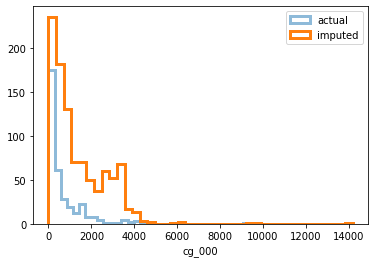

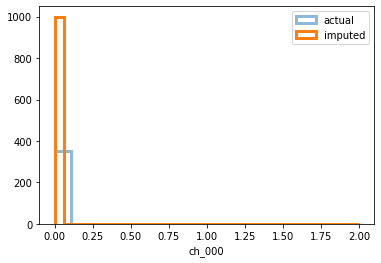

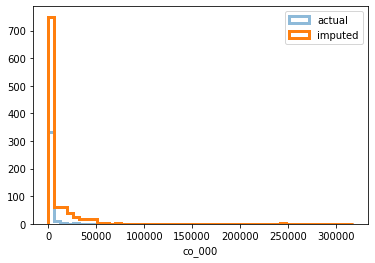

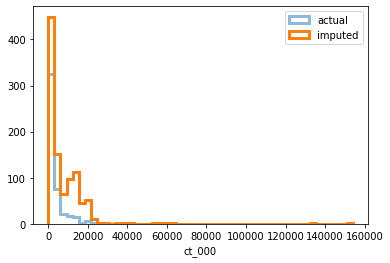

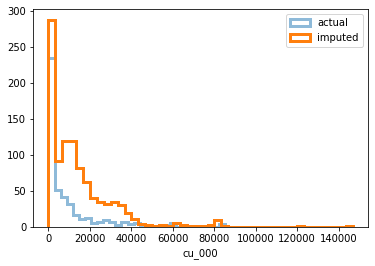

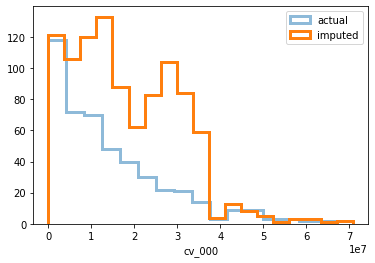

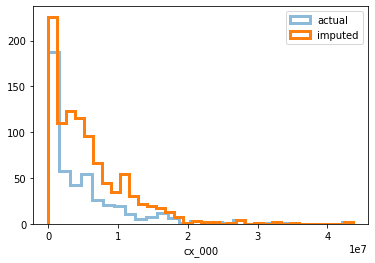

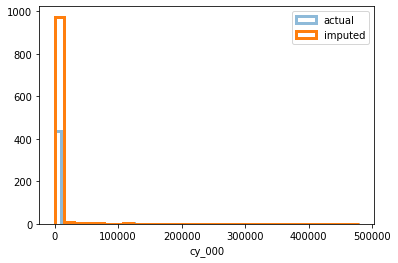

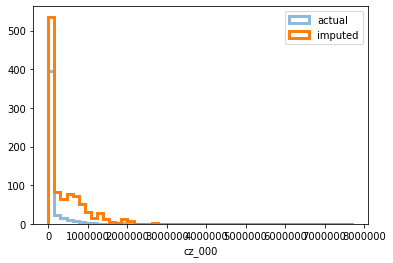

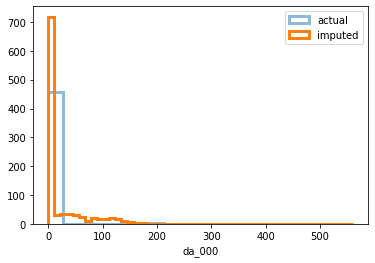

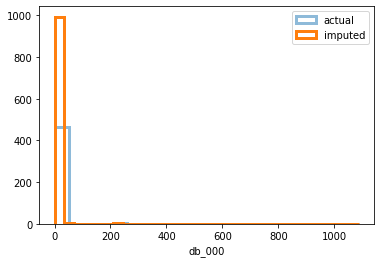

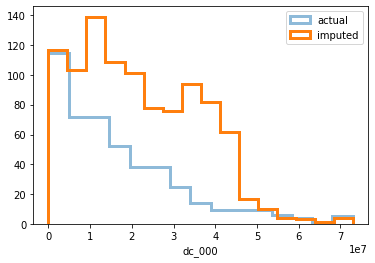

In [64]:
for feature in features_for_soft_impute:
        sns.distplot( train_median_imputed.loc[train_median_imputed["class"]==1,feature], label ="actual",
                     kde = False, hist_kws={"histtype": "step", "linewidth": 3,
                                            "alpha": 0.5})
        sns.distplot( train_imputed.loc[train_imputed["class"]==1, feature], label ="imputed", 
                     kde = False,  hist_kws={"histtype": "step", "linewidth": 3,
                                             "alpha": 1})
        plt.legend()
        plt.show()

#### 3.4.2 Histograms for negative class

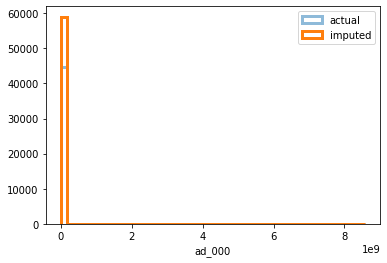

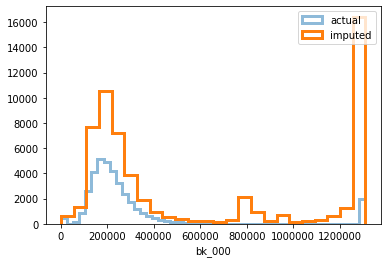

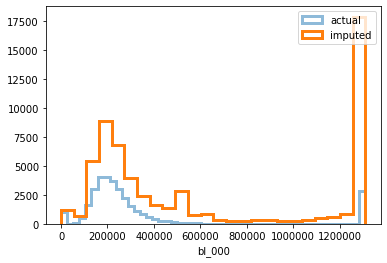

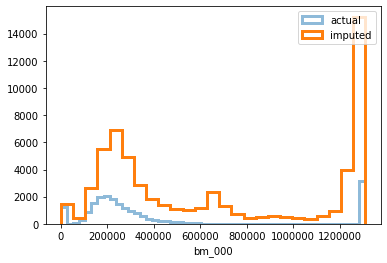

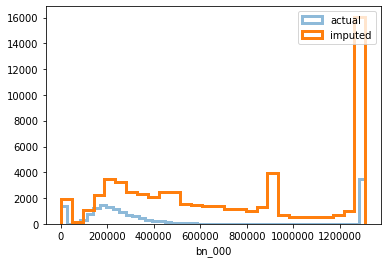

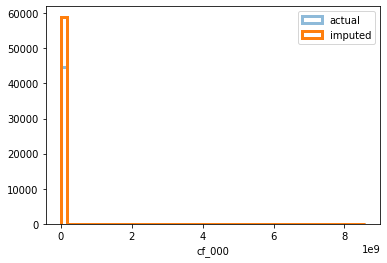

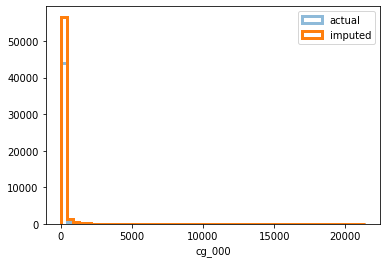

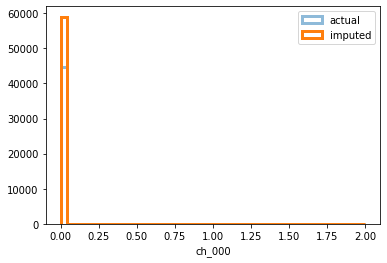

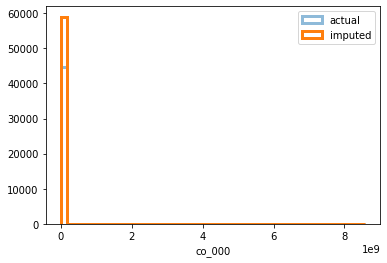

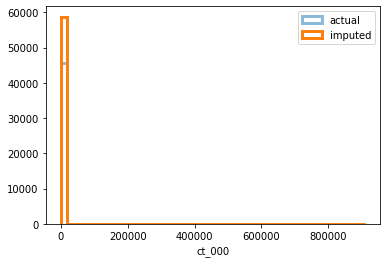

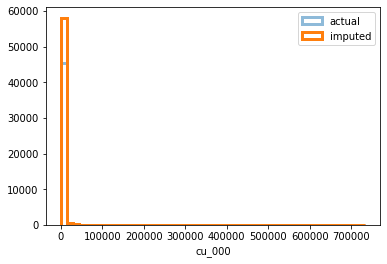

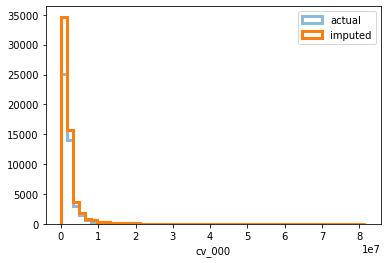

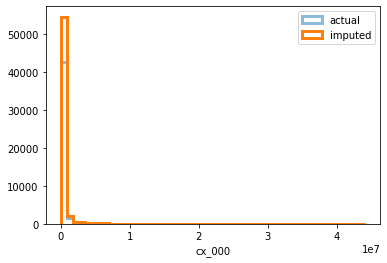

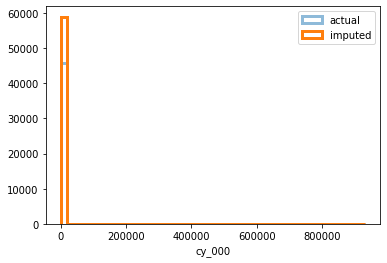

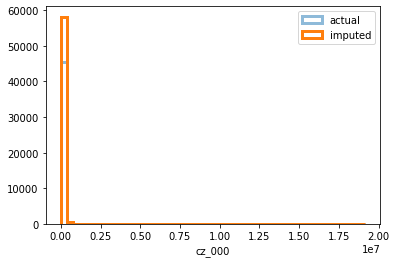

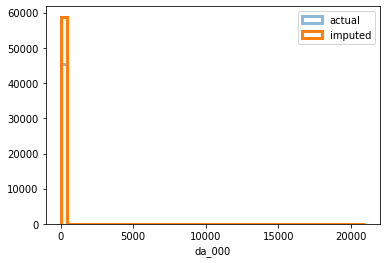

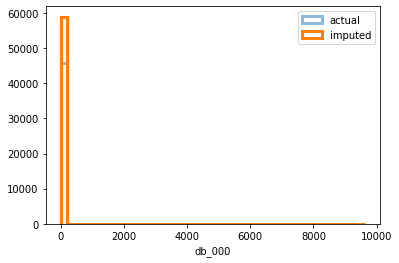

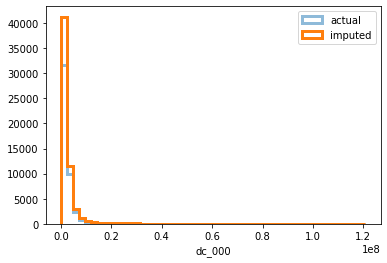

In [65]:
for feature in features_for_soft_impute:
        sns.distplot( train_median_imputed.loc[train_median_imputed["class"]==0,feature], label ="actual",
                     kde = False, hist_kws={"histtype": "step", "linewidth": 3,
                                            "alpha": 0.5})
        sns.distplot( train_imputed.loc[train_imputed["class"]==0, feature], label ="imputed", 
                     kde = False,  hist_kws={"histtype": "step", "linewidth": 3,
                                             "alpha": 1})
        plt.legend()
        plt.show()

    Distribution of features which were selected for soft imputation have not changed much  before and after imputation as apparent from above histograms. This is true for both train and test dataset

## 4. EDA for counter data


### 4.1. Selecting counter and histogram feature

In [66]:
all_features = list([col for col in train_imputed.columns if "_" in col]) # selecting all columns with "_"
histogram_feature_groups = []
for feature in all_features :
    if int(feature.split("_")[1]) != 0: # A feature is selected as histogram feature if there are bin numbers that are not equal to 0 after "_"
        histogram_feature_groups.append(feature.split("_")[0])# Only Tag name are selected
histogram_feature_groups = set(histogram_feature_groups)
hist_features = [x for x in all_features if x.split("_")[0] in histogram_feature_groups]  # histogram features
counter_features = [x for x in all_features if x.split("_")[0]  not in histogram_feature_groups  # Counter featurea
                   if x !=  "class"]

print(histogram_feature_groups)

{'cs', 'az', 'ba', 'ay', 'ag', 'ee', 'cn'}


In [79]:
train_counter_df = train_imputed[counter_features ].copy() # Data with only counter variables
train_counter_df["class"] = train_imputed["class"]

print(train_counter_df.shape )


test_counter_df = test_imputed[counter_features ].copy()
test_counter_df["class"] = test_imputed["class"]

(60000, 94)


### 4.2.  KS test to identify feature importance

    Since there are 94 counter/ numerical features, analysing all will not be possible therefore we will fist identify top importance features and then perform EDA on those. To do so KS test has been performed to identify if the distribution of a feature for positive and negative class are different or not. Given a feature if distribution for positive class and negative class are different then the feature is said to be important feature from classification point of view. KS stats is good indicator of difference in distribution and has been used to identify top 5 and bottom 5 features


In [80]:
def feature_importance_KS_test(data):
    global counter_features
    feature_imp_df =dict()
    stats = np.array([])
    p_vals = np.array([])
    from scipy.stats import ks_2samp
    pos_data = data[data["class"] == 1].copy()
    neg_data = data[data["class"] == 0].copy()
    pos_data.drop("class", axis =1, inplace =True)
    for col in pos_data.columns:
        stat, p_val = ks_2samp(pos_data[col].dropna().values, neg_data[col].dropna().values)
        stats = np.append(stats, stat)
        p_vals = np.append(p_vals, p_val)

    feature_imp_df["KS_stat"] = stats
    feature_imp_df["p_values"] = p_vals
    return(pd.DataFrame(feature_imp_df, index = counter_features).sort_values("KS_stat", ascending = False))

In [81]:
feature_imp = feature_importance_KS_test(train_counter_df)

top_features = list(feature_imp.head(5).index)
bottom_feature = list(feature_imp.tail(5).index)
print("top 5 impotant counter features based on KS test are", top_features)
print("bottom 5 impotant counter features based on KS test are", bottom_feature)

top 5 impotant counter features based on KS test are ['ck_000', 'bj_000', 'ci_000', 'dn_000', 'ap_000']
bottom 5 impotant counter features based on KS test are ['dm_000', 'dl_000', 'dk_000', 'dj_000', 'ch_000']


### 4.3. Distribution plot for top features

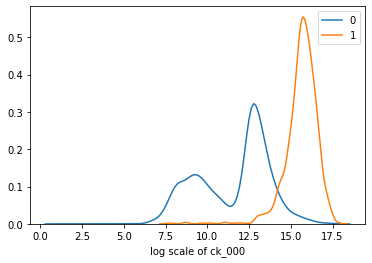

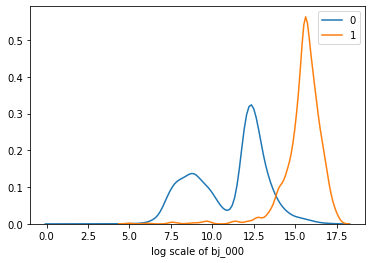

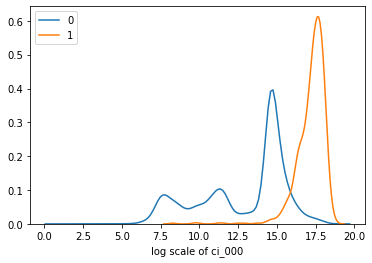

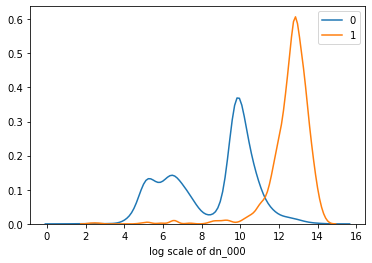

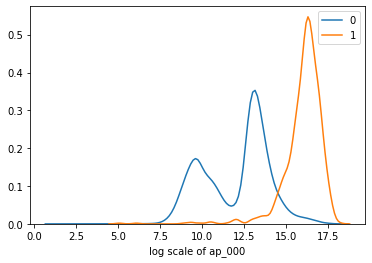

In [109]:
for feature in top_features:
# feature ="ck_000"
    sns.kdeplot(np.log(train_counter_df.loc[(train_counter_df["class" ]== 0) & (train_counter_df[feature ]>0),
                                            feature] ), label =0) 
    sns.kdeplot(np.log(train_counter_df.loc[(train_counter_df["class" ]== 1) & (train_counter_df[feature ]>0),
                                            feature] ), label = 1)
    plt.xlabel(feature)
    plt.xlabel("log scale of "+feature)
    plt.legend
    plt.show()

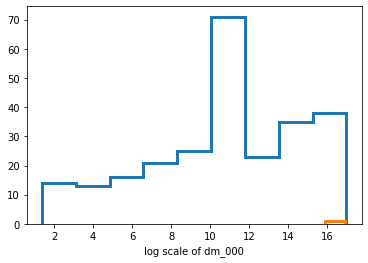

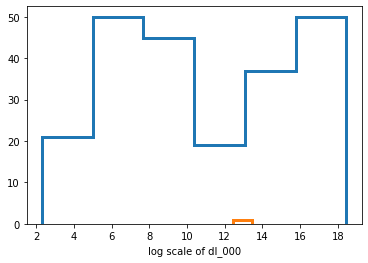

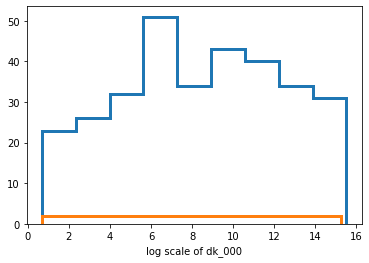

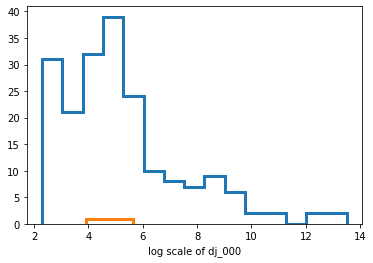

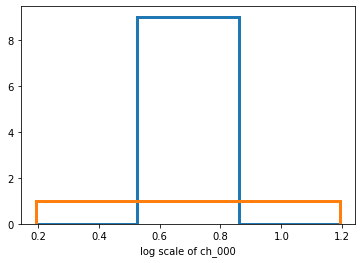

In [83]:
for feature in bottom_feature:
    sns.distplot(np.log(train_counter_df.loc[(train_counter_df["class" ]== 0) & 
                                            (train_counter_df[feature] > 0) , feature] ), label =0, kde = False, 
                 hist_kws={"histtype": "step", "linewidth": 3,
                                             "alpha": 1}) 
    
    sns.distplot(np.log(train_counter_df.loc[(train_counter_df["class" ]== 1) &
                                            (train_counter_df[feature] > 0),  feature]), label = 1, kde = False,
                 hist_kws={"histtype": "step", "linewidth": 3,
                                             "alpha": 1}) 
    plt.xlabel(feature)
    plt.xlabel("log scale of "+feature)

    plt.legend
    plt.show()

    From the above distribution plots and histogram plots we can observe that top features based on KS stats have good information for classification. Similarly bottom features have almost similar distribution for both classes. 
    From this analysis we can conclude that there are features which have very less or nor discrimination power and should not be included during modelling and hence feature selection should be performed. 

## 5 EDA for histogram data
Inspired by work done in https://www.kaggle.com/percevalve/scania-dataset-eda-for-histograms.

    Any histogram represent a population and in this dataset there are 7 histogram tags. The first idea is to identify population count for each group 

In [84]:
#######----- Selecting histogram features-----#####
train_hist_df = train_imputed[hist_features ].copy()
train_hist_df["class"] = train_imputed["class"]
print(train_hist_df.shape )

test_hist_df = test_imputed[hist_features ].copy()
test_hist_df["class"] = test_imputed["class"]


(60000, 71)


### 5.1  Calculating histogram count feature

In [85]:
## All bins belong to same histogram group is added rowwise. All bins of histogram group "cn" are
## "['cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009']" 
## All values in these bins are added row wise. So for each histogram group we get 59798 x1 dim vector which is 
## added to a dictionary with group name as key.

def calculate_Hist_count(data):
    '''Thiis function calculates sum of all bins present in a tag belonging to histogram features
    This function returns a Pandas dataframe with 7 columns representing 7 histogram tags. the 
    value in each cell of this dataframe is the sum of all bins that belongs to same tag.
    '''
    global histogram_feature_groups

    Hist_group_sum =dict()
    for idx , histogram_feature_group in enumerate(histogram_feature_groups):
        grp_cols =  [x for x in data.columns if x.split("_")[0] == histogram_feature_group]
        Hist_group_sum[histogram_feature_group] = data[grp_cols].sum(axis=1) 

    Hist_count = pd.DataFrame(Hist_group_sum, index = data.index)
    return(Hist_count)



In [86]:
Hist_count_train = calculate_Hist_count(train_hist_df)
print(Hist_count_train.head(5))
train_hist_df["histogram_count"] = Hist_count_train.max(axis =1) 

Hist_count_test = calculate_Hist_count(test_hist_df)
test_hist_df["histogram_count"] = Hist_count_test.max(axis =1) 

          cs         az         ba         ay         ag         ee         cn
0  6167850.0  6167850.0  6167850.0  6167850.0  6167850.0  6167850.0  6167850.0
1  2942850.0  2940714.0  2942850.0  2940714.0  2940714.0  2940714.0  2942850.0
2  2560566.0  2560566.0  2560566.0  2560566.0  2560566.0  2560566.0  2560566.0
3     7634.0     7634.0     7634.0     7634.0     7634.0     7634.0     7634.0
4  3946944.0  3946944.0  3946944.0  3946944.0  3946944.0  3946944.0  3946944.0


    From the above Dataframes/table, we can observe that row-sum for each histogram group ("cn", "ee","cs","ag", "az", "ay", "ba" ) are same(barring  very few cases). So for a sample count for all histogram features are same.There fore row wise sum of bins for a specific tag is added as a new feature to the dataset 

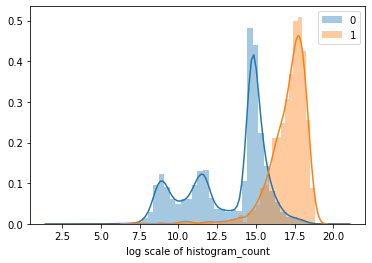

In [87]:
sns.distplot(np.log(train_hist_df.loc[(train_hist_df["class" ]== 0) & (train_hist_df["histogram_count"] > 0) ,
                                 "histogram_count"]), label =0) ## Adding 2 to compensae for -1 for missing values
sns.distplot(np.log(train_hist_df.loc[(train_hist_df["class" ]== 1) & (train_hist_df["histogram_count"] > 0) ,
                                 "histogram_count"]), label =1)
plt.xlabel("log scale of histogram_count")
plt.legend()
plt.show()

    From these plots we can observe that distribution of histogram_count feature is different and looks to be a crucial feature with good classification capability. A higher count results in more failure compared to lower count. 
    Secondly, from the description of data given in IDA 2016 website, as bin number increases the value of tag increases. If we consider the example provided in the description 
    •	bin 1 collect values for temperature T < -20
    •	bin 2 collect values for temperature T >= -20 and T < 0     
    •	bin 3 collect values for temperature T >= 0 and T < 20  
    •	bin 4 collect values for temperature T > 20 
    If we consider each tag as a stress factor which contributes towards the life of APS system(can be positive or negative) then as bin number changes from bin 1 to bin 4 stress increase/decreases(depends on impact of stress factor). Therefore the area under the histogram should be used as a feature as well. To do so each bin count is multiplied with bin number and added . the weighted sum is normalized with histogram count. This is added as "AUC features


### 5.2. Calculating Area under histogram feature

In [88]:
def calculate_AUC(data):
    '''This function calculate normalized area under the histogram fpr each histogram feature
    '''
    data_local = data.copy()
    global histogram_feature_groups
    weight = np.arange(1,11,1).reshape(-1,1)
    AUC = dict()
    for idx , histogram_feature_group in enumerate(histogram_feature_groups):
        grp_cols =  [x for x in data.columns if x.split("_")[0] == histogram_feature_group]
        data_local["AUC_"+ histogram_feature_group]=(data_local[grp_cols].values.dot(weight).flatten())/(data_local[grp_cols].values.sum(axis= 1)+0.0001)
    return(data_local)



In [89]:
train_hist_df = calculate_AUC(train_hist_df)
test_hist_df = calculate_AUC(test_hist_df)
train_hist_df.head()

,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_009,class,histogram_count,AUC_cs,AUC_az,AUC_ba,AUC_ay,AUC_ag,AUC_ee,AUC_cn
0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,...,0.0,0,6167850.0,5.775373,5.888907,3.286253,7.283087,6.927383,3.371597,6.011868
1,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,...,1500.0,0,2942850.0,5.598332,5.615485,3.002679,7.722455,6.962664,3.300619,5.676461
2,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,...,514.0,0,2560566.0,5.974076,5.259351,2.847989,8.226456,6.977771,4.525642,5.587032
3,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,...,0.0,0,7634.0,5.099817,6.460571,1.653393,8.733036,5.872151,1.353157,4.212470
4,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,...,1218.0,0,3946944.0,6.070133,5.989454,3.113087,7.387961,6.515245,4.440635,5.198842


In [111]:
train_df_with_added_features = pd.concat([train_counter_df, train_hist_df.drop("class", axis=1, inplace= False )], axis= 1).sort_index()
test_df_with_added_features = pd.concat([test_counter_df, test_hist_df.drop("class", axis=1, inplace= False )], axis= 1).sort_index()

print("Shapes of train and test data after adding new features are ", 
      train_df_with_added_features.shape, 
      test_df_with_added_features.shape, "respectively")

#####-----Storing imputed file-----#####
train_df_with_added_features.to_csv("train_data_added_features.csv")
test_df_with_added_features.to_csv("test_data_added_features.csv")

Shapes of train and test data after adding new features are  (60000, 172) (16000, 172) respectively


#### 5.2.1 Distribution plot (univariate analysis)
     In the below section distribution plots of all 7 AUC related features for class 0 and 1 will be shown. Below plots will be helpful in identifying if added AUC feature have discrimination power or not

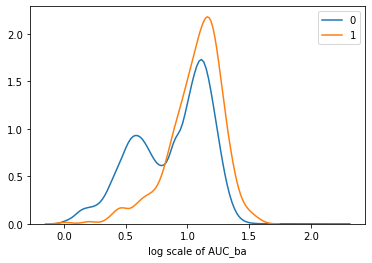

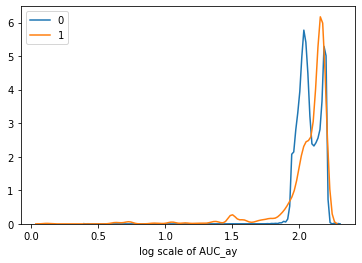

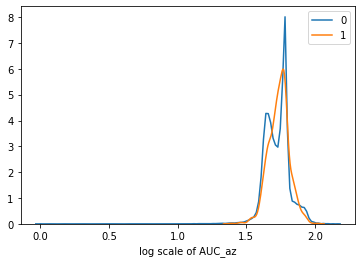

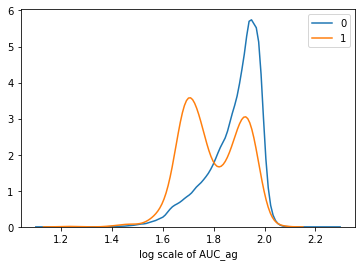

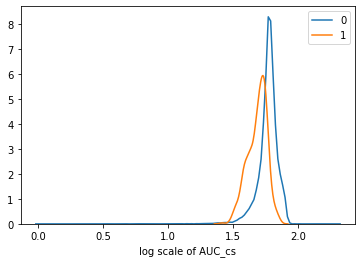

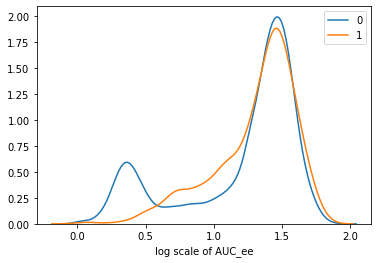

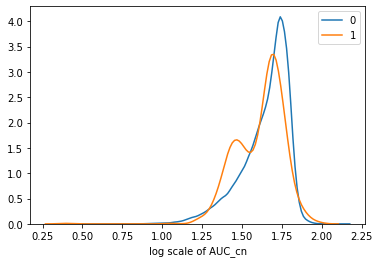

In [56]:
AUC_features = list(set(train_hist_df_2.columns)- set(train_hist_df.columns))
for AUC_feature in (AUC_features):
# AUC_feature = "AUC_ay"  
    sns.kdeplot(np.log(train_hist_df_2.loc[(train_hist_df_2["class" ]== 0) & (train_hist_df_2[AUC_feature] > 0) ,
                                     AUC_feature] ), label =0) ## Adding 11 to compensae for -10 for missing values
    sns.kdeplot(np.log(train_hist_df_2.loc[(train_hist_df_2["class" ]== 1) & (train_hist_df_2[AUC_feature] > 0),
                                     AUC_feature]), label = 1)

    plt.xlabel("log scale of " +AUC_feature)
    plt.legend
    plt.show()

    From the above plots it can be observed that few tag groups like "ag" and "ac" have different distributions for both classes and will be helpful in classification task.

## 6 Conclusions from EDA (Part 1)


    1. Three is significant class imbalance and ratio of positive to negative sample is 1:500. in order to address this over sampling of minority class is performed using ADASYN algorithm.
    2. There are nor duplicate columns or rows in the data.
    3. There are significant amount of missing data. From the distribution plots it is apparent that for most of the features fraction of missing data is <= 50%. However, there are few features which have more than 75% of missing data. This observation is consistent for both train and test data. Maximum fraction of missing data is observed for feature "br_000" with 82.05625% of missing values. In total there is 8.3% of missing values in entire data.
    5. By dropping features with 75% or more fraction of missing data total percentage of missing data reduced to 5.5% from 8.3%. There were 7 features with more than or equal to 75% of missing data.
    4. Feature 'cd_000' has constant value and was dropped from data.
    5. There were no missing data in target column.
    6. For imputation features with more than 20% missing data has been selected for median imputation. there were 145 such features out of 163 features. Remaining 18 features were having more than 20% missing values and were selected for soft imputation.
    7. From the VIF score it was evident that there are many correlated features. Therefore, before performing soft imputation correlated features from the list of median imputed features were removed. This step resulted in a list of 92 uncorrelated feature from a list of 145 features. This step was performed mainly to reduce computational effort during soft imputation.
    8. Median and soft imputation for positive and negative class are performed separately. 
    9. Out of 18 selected features for soft imputation 11 features can be modelled using all other features with a r square score of atleast 0.1. There are 7 remaining features which had poor R square values indicating that these features are not suitable for soft imputation. List of remaining features is ['ad_000', 'ch_000', 'cy_000', 'co_000', 'cf_000', 'da_000', 'db_000']. Median imputation has been implemented for these 7 remaining features.
    10. Above imputation strategy did not change the original distribution of data
    11. KS test on counter data revealed that out of 94 counter features, there are many features which does not have much useful information for classification. Therefore, a feature selection method may help classification task and should be evacuated.
    12. From analysis of histogram features, we observed that row-sum for each histogram group ("cn", "ee","cs","ag", "az", "ay", "ba" ) are same(barring  very few cases). Therefore row wise sum of bins for a specific tag is added as a new feature to the dataset. 
    13. Similarly AUC features were also added as they may indicate stress factor. From their distribution plot it was observed that some had very good discrimination power compared to others. 
    